In [25]:
import pandas as pd


df = pd.read_csv("C:/Users/ajith/Downloads/extracted_dataset/cleaned_titanic.csv")

X = df[['Pclass', 'Age', 'SibSp', 'Parch']]  
y = df['Survived']  


In [27]:
X = X.copy()  
X.fillna(X.mean(), inplace=True)  

In [29]:
X_cleaned = X.fillna(X.mean())  

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[ 2 12]
 [ 0 23]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.66      1.00      0.79        23

    accuracy                           0.68        37
   macro avg       0.83      0.57      0.52        37
weighted avg       0.79      0.68      0.59        37

ROC AUC Score: 0.5714285714285714


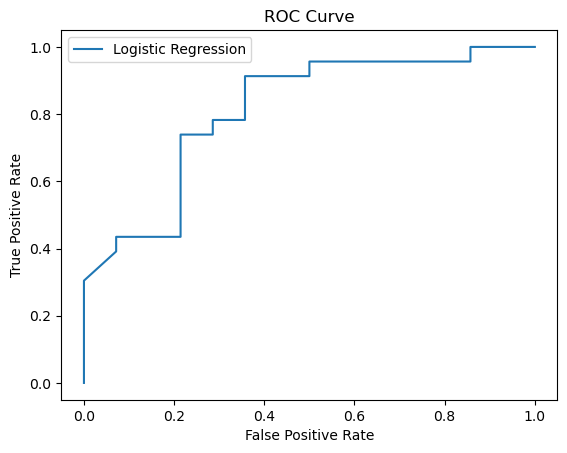

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
